In [ ]:
!pip install pyarrow==12.0.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 12.0.1 which is incompatible.
pylibcudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 12.0.1 which is incompatible.


In [ ]:
# Step 1: Install Required Libraries
!pip install tqdm pandas matplotlib langchain langchain-community torch pyngrok

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Import Libraries
import pandas as pd
from tqdm.notebook import tqdm
# from datasets import Dataset
import matplotlib.pyplot as plt
from langchain.docstore.document import Document as LangchainDocument
from langchain.text_splitter import RecursiveCharacterTextSplitter
# from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import torch

# Example usage of imported libraries
# This is just a placeholder to show that the imports are working fine
print("Libraries imported successfully!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12
Mounted at /content/drive
Libraries imported successfully!


In [ ]:
pip install PyPDF2 python-docx pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.4 MB/s eta 0:00:00


In [ ]:

import os
from PyPDF2 import PdfReader
from docx import Document
import pandas as pd
from langchain.schema import Document as LangchainDocument  # Import LangchainDocument

# PDF Reader
def read_pdf(file_path):
    try:
        reader = PdfReader(file_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load PDF {file_path}: {str(e)}")
        return None

# DOCX Reader
def read_docx(file_path):
    try:
        doc = Document(file_path)
        text = "\n".join([para.text for para in doc.paragraphs])
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load DOCX {file_path}: {str(e)}")
        return None

# CSV Reader
def read_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        text = df.to_string()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load CSV {file_path}: {str(e)}")
        return None

# XLSX Reader
def read_xlsx(file_path):
    try:
        df = pd.read_excel(file_path)
        text = df.to_string()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load XLSX {file_path}: {str(e)}")
        return None

# Generic File Reader
def read_file(file_path):
    extension = os.path.splitext(file_path)[1].lower()
    if extension == ".txt":
        try:
            with open(file_path, "r") as file:
                print(f"Successfully loaded: {file_path}")
                return file.read()
        except Exception as e:
            print(f"Failed to load TXT {file_path}: {str(e)}")
            return None
    elif extension == ".pdf":
        return read_pdf(file_path)
    elif extension == ".docx":
        return read_docx(file_path)
    elif extension == ".csv":
        return read_csv(file_path)
    elif extension == ".xlsx":
        return read_xlsx(file_path)
    else:
        print(f"Unsupported file type: {file_path}")
        return None

# Processing all files in a folder and append to RAW_KNOWLEDGE_BASE as LangchainDocuments
def process_folder(folder_path):
    RAW_KNOWLEDGE_BASE = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            file_content = read_file(file_path)
            if file_content:
                # Appending as LangchainDocument
                RAW_KNOWLEDGE_BASE.append(LangchainDocument(page_content=file_content))
    return RAW_KNOWLEDGE_BASE

folder_path = "/content/drive/MyDrive/RAG_inputs"
RAW_KNOWLEDGE_BASE = process_folder(folder_path)

Successfully loaded: /content/drive/MyDrive/RAG_inputs/academic_regulations.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/kmit_courses.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/ecet.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/fees.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Uniqueness.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Research.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Iqac.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/placements.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Initiatives.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Infrastructure.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Examinations.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Departments.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Admission.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Administration.txt
Successfully load

In [ ]:
print(len(RAW_KNOWLEDGE_BASE))
print(RAW_KNOWLEDGE_BASE)

17
[Document(metadata={}, page_content="The academic regulations for the B.Tech program at the institution have evolved over the years, with different sets of regulations guiding each batch. Below is an overview of the academic regulations for each regulation code.\n\nKR23: The academic regulations under the KR23 Regulation are autonomous and apply to the latest batch of students. This set of regulations introduces the most recent changes to the B.Tech program.\n\nKR21: Labeled as KR21, this set of academic regulations is also autonomous and was applicable to the batch of students that commenced their studies under this regulation.\n\nKR20: The KR20 Regulation represents another autonomous academic framework that was established for the corresponding batch of students during that period.\n\nR18: The R18 Regulation governs the academic structure and policies for students who were admitted under this batch, providing guidelines and rules specific to their academic journey.\n\nR16: Outlin

2
[Document(metadata={'start_index': 0}, page_content='The academic regulations for the B.Tech program at the institution have evolved over the years, with different sets of regulations guiding each batch. Below is an overview of the academic regulations for each regulation code.\n\nKR23: The academic regulations under the KR23 Regulation are autonomous and apply to the latest batch of students. This set of regulations introduces the most recent changes to the B.Tech program.\n\nKR21: Labeled as KR21, this set of academic regulations is also autonomous and was applicable to the batch of students that commenced their studies under this regulation.\n\nKR20: The KR20 Regulation represents another autonomous academic framework that was established for the corresponding batch of students during that period.\n\nR18: The R18 Regulation governs the academic structure and policies for students who were admitted under this batch, providing guidelines and rules specific to their academic journey.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='thenlper/gte-small', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)
[101, 7592, 2088, 1010, 6160, 102]
[CLS] hello world [SEP]
[101, 2204, 9061, 102]


  0%|          | 0/396 [00:00<?, ?it/s]

[176, 133, 143, 234, 210, 217, 6, 209, 23, 203, 136, 75, 166, 152, 158, 198, 184, 109, 263, 131, 17, 5, 212, 23, 201, 180, 189, 143, 194, 98, 268, 160, 205, 104, 67, 143, 190, 26, 186, 232, 192, 196, 247, 217, 209, 153, 208, 234, 218, 244, 230, 214, 236, 254, 239, 243, 273, 263, 275, 199, 221, 238, 260, 248, 243, 265, 221, 216, 261, 232, 265, 237, 221, 210, 285, 328, 212, 248, 222, 260, 218, 228, 261, 232, 249, 39, 264, 290, 190, 108, 4, 276, 244, 231, 213, 167, 162, 173, 119, 214, 192, 86, 174, 198, 214, 201, 217, 236, 205, 190, 108, 147, 79, 274, 49, 120, 227, 258, 106, 8, 174, 153, 154, 138, 112, 205, 97, 137, 126, 59, 202, 30, 434, 439, 453, 458, 455, 447, 454, 140, 140, 434, 448, 466, 454, 444, 456, 444, 457, 455, 454, 461, 449, 458, 443, 452, 444, 459, 453, 452, 439, 445, 453, 465, 448, 447, 453, 447, 448, 430, 462, 457, 464, 443, 437, 446, 446, 440, 432, 453, 447, 463, 447, 444, 258, 115, 109, 186, 165, 214, 146, 136, 171, 156, 124, 129, 159, 180, 193, 183, 164, 131, 175, 184, 7

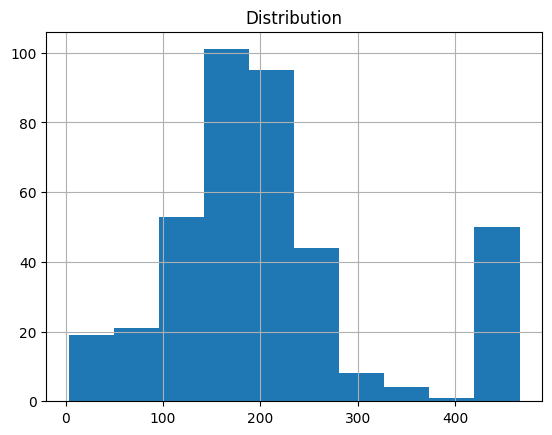

In [ ]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

MARKDOWN_SEPARATORS = [
    "\n#{1,6}",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n__+\n",
    "\n\n",
    "\n",
    " ",
    ""
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)
# creating an instance or object of RecursivecharacterTextSplitter, so that we can access its
# methods like split_documents, by passing parameters we are getting required results

# chunk overlap =100 means that consecutive chunks have 100 characters in common,
# it is used for retention of actual meaning even if the chunks are splitted

docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs= text_splitter.split_documents([doc])
    # here docs is array of chunks of that single file [doc]
    print(len(docs))
    print(docs)
    docs_processed += docs

# docs_processed is a array of chunks of all files
print(len(docs_processed))

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")  # or all-MiniLM-L6-v2.
# tokenizer gives the description of the model
print(tokenizer)

print(tokenizer.encode("Hello world, Welcome"))
print(tokenizer.decode([101,7592,2088,102]))
print(tokenizer.encode("Good bye"))
# hello world is encoded into array of integers of size 4 like [101,7592, 2088, 102]
# hello world, welcome is encoded into array of integers of size 6 like [101,7592,2088,1010,6160,102]
# i infered that starting and ending integer values are special tokens used by hugging face to mark begginig and ending points
# numbers are intrnally mapped to actual words or sub-words, tokenizer.decode() - connverts back to word


lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
print(lengths)
# here first each chunk is tokenized , then the tokenized is nothing but array of numbers starting with 101 and ending with 102, and in between numbers chnages,
# the size of the array differs with length of words, if words are more, we get bigger size array, so the length of array is pushed into lengths array to know length of each token

fig = pd.Series(lengths).hist()
fig.set_title("Histogram of Document Lengths")
plt.title("Distribution")
plt.show()
# here the x-axis denotes the document lengths ranging from 0 to max length of some document
# histogram making a bin with some fixed value 100, like from 0 to 100 length of documents , the y-axis
# denotes no. of doucments have length between 0-100 range length , just for understanding data better

In [ ]:
# above code split_documents was splitting into chunks based only on **text characters**
# above one provided only basic chunking, but didn't necessarily consider the semantic meaning of the text
from typing import Optional, List
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"

def split_documents(
        chunk_size: int,
        knowledge_base: list[LangchainDocument],
        tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )
    # here split_documents is explicitly defined becoz to make **token aware**,
    # means it splits based on **text characters**, but it uses the tokenizer to ensure it's not breaking
    # apart meaningful tokens, this helps in semantic integrity of chunks

    # here tokenizer internally converts into text into tokens , which are semantic units(like words or subwords)
    # that the language model understands, but it doesn't return token splitted ones, it only returns splitted text.
    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])
        # here text chunks are created using tokenization as a guide

        # while tokens are direct inputs to language models but they are not stores because of
        # human readability like for developers to debug becomes complex, and takes more space

    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)
    return docs_processed_unique

docs_processed = split_documents(512, RAW_KNOWLEDGE_BASE, tokenizer_name=EMBEDDING_MODEL_NAME)
# chunk size in tokens is 512 like it is just a guide to split text based on considering 512 tokens meaning,
# like each token is greater than each character , so size decreased to 512
print(len(docs_processed))
# in previous block it is 396, it is decreased to 210 after splitting text based on **token aware** guide and unique texts
print(docs_processed[0:3])


210
[Document(metadata={'start_index': 0}, page_content="The academic regulations for the B.Tech program at the institution have evolved over the years, with different sets of regulations guiding each batch. Below is an overview of the academic regulations for each regulation code.\n\nKR23: The academic regulations under the KR23 Regulation are autonomous and apply to the latest batch of students. This set of regulations introduces the most recent changes to the B.Tech program.\n\nKR21: Labeled as KR21, this set of academic regulations is also autonomous and was applicable to the batch of students that commenced their studies under this regulation.\n\nKR20: The KR20 Regulation represents another autonomous academic framework that was established for the corresponding batch of students during that period.\n\nR18: The R18 Regulation governs the academic structure and policies for students who were admitted under this batch, providing guidelines and rules specific to their academic journe

In [ ]:
# !pip install transformers
!pip install sentence-transformers faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 31.7 MB/s eta 0:00:00


In [ ]:
# This code block transforms text chunks into a **searchable vector database**
from langchain.vectorstores import FAISS  # or pinecone/ chroma
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import torch

print(torch.cuda.is_available())
# gpu required for faster execution of process here

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},
)
# here text chunks are converted into vector representations using an embedding model.
# each text chunk = each vector
# to improve search accuracy normalize embeddings are true here

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(  # this lines creates **FAISS vector database**
    docs_processed,     # providinng text chunks as input
    embedding_model,    # or euclidian distance
    distance_strategy=DistanceStrategy.COSINE, # cosine_similarity for comparing vectors during only searching for query vector.
) # cosine is not used when intialization of vectors from text chunks.

# the vector representations are stored in FAISS database for efficceient similarity search.
# this allows us to perform semantic search by providing a query and finding the chunks most similar to the query
# based on vector represenations, using cosine similarity between vectors and query, it finds relevant chunk.


# Why Vectors?
# Representing Text Meaning: Vectors are used to represent the meaning of text in a numerical format that computers can understand and process.
# Each dimension of the vector captures a different aspect of the text's meaning, allowing for nuanced comparisons.

# How Cosine Similarity Works ?
# Measuring Angle, Not Magnitude: Cosine similarity focuses on the angle between two vectors rather than their magnitudes.
# provides a measure of how semantically aligned two texts are, regardless of their length or specific word choices.

# seacrhes for high cosine similarity value which we get from query vector and each vector in databse



# MORE INFO --
# A cosine similarity of 1 means the vectors are perfectly aligned (pointing in the same direction), indicating high semantic similarity.
# A cosine similarity of 0 means the vectors are orthogonal (perpendicular), indicating no semantic relationship.
# A cosine similarity of -1 means the vectors are pointing in opposite directions, indicating dissimilarity.
# During the search, the database identifies the points (text chunks) in the vector space that are closest to the query point (query vector) based on the cosine similarity measure.
# These closest points represent the chunks that are most semantically similar to the query.

True


<ipython-input-9-01a125db8819>:10: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# setting text genertion pipeline
# This pipeline will be used to generate responses based on user queries and the context retrieved from the vector database.
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)
# to ensure reproducibility, by  using the same seed 0, we can gurantee that u will get the same result if u run
# ur multiple times., if value changed means it is intialising with different weights, leading to different results.

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",  # or meta-llama/Llama-2-13b-chat-hf
    device_map="cuda",
    torch_dtype="auto", # selects approprate data type based on available hardware
    trust_remote_code=True, # load models that contain custom code
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

# Tokenizer Specificity: Each pre-trained model is typically trained with a specific tokenizer.
# The tokenizer is responsible for converting text into tokens that the model understands.
# Using a different tokenizer could lead to mismatches and incorrect model behavior.

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)
# pipline encapsulates tasks like loading model and tokenizer, handles preprocessing and processing steps.
# it is a convient way to use pre-trained models without having to manually manage the individual steps involved.

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False, # if true question and answer are returned
    "temperature": 0.4,
    "do_sample": False, # if true, leads diverse outputs and if false, correct output but lacks creativity
}
# defines a dictionary of arguments that will be passed to the pipeline during text generation

config.json:   0%|          | 0.00/3.48k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

Device set to use cuda


In [ ]:


prompt_chat = [
    {
        "role": "system",
        "content": """You are a specialized assistant (chatbot for the KMIT website) designed to handle queries and provide information exclusively related to the KMIT website.
        Your first step is to search the context provided to you to extract relevant answers. If the context does not provide enough information, respond by saying that the information is not available on the KMIT website.

        If the user asks a question that is outside the scope of the KMIT website(provided context), respond with 'I am sorry, I cannot find the answer as I am a chatbot for the KMIT website, and I can only answer questions based on the provided context.'

        Your responses should be strictly based on the provided KMIT website context. Ensure your tone is friendly, polite, and conversational, maintaining a professional demeanor while answering questions related to KMIT."""
    },
    {
        "role": "user",
        "content": """Context:
{context}
---
Now here is the question you need to answer.
Question: {question}"""
    }
]
 # prompt_chat is a list of 2 dictionaries, one for system role giving instructiois to model and
 # other is user role , to display answer

RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_chat, tokenize=False, add_generation_prompt=True,
)
# creates a template for RAG_prompt, tokenize false to not to tokenize at this stage, special token
# to when to genrate text by generation_prompt is truw
print(RAG_PROMPT_TEMPLATE)


# The pipeline is the engine for text generation.
# The prompt_chat and RAG_PROMPT_TEMPLATE are the instructions that guide the engine to produce meaningful and relevant outputs.


<|system|>
You are a specialized assistant (chatbot for the KMIT website) designed to handle queries and provide information exclusively related to the KMIT website.
        Your first step is to search the context provided to you to extract relevant answers. If the context does not provide enough information, respond by saying that the information is not available on the KMIT website.

        If the user asks a question that is outside the scope of the KMIT website(provided context), respond with 'I am sorry, I cannot find the answer as I am a chatbot for the KMIT website, and I can only answer questions based on the provided context.'

        Your responses should be strictly based on the provided KMIT website context. Ensure your tone is friendly, polite, and conversational, maintaining a professional demeanor while answering questions related to KMIT.<|end|>
<|user|>
Context:
{context}
---
Now here is the question you need to answer.
Question: {question}<|end|>
<|assistant|>



In [ ]:
u_query = "How many students have got placement more than 40 lakh per annum?"
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

# similarity_search is a predefined method
context = retrieved_docs[0].page_content
# text chunk is retrieved
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)
# then the text chunk is passed into rag_prompt_template, it is nothing but final_prompt
output = pipe(final_prompt, **generation_args) # ** is unpacking
print(output)
# now the final_prompt is passed into pipeline of text-genration model
print(retrieved_docs)

print(context)

print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.4` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48


[{'generated_text': " According to the provided context, 10 students from KMIT's Class of 2024 have received job offers with a salary of more than 40 lakhs per annum."}]
[Document(id='56721951-1306-41ab-a2d2-9fa38022000d', metadata={'start_index': 0}, page_content="Placements - Bhavishya Dwar\nSuccess Stories\nKMIT continues to maintain the streak of record placements for 2023-2024 Batch. So far 103 companies have visited the campus and 662 offers were rolled out. 511* out of 557 registered students got placed with an average salary of 9.69LPA.\n\nHighlights:\n1. 10 students received job offers with salary of more than 40 lakhs per annum.\n2. 06 students received job offers with salaries between 20 to 40 lakhs per annum.\n3. 61 students received job offers with salaries between 15 to 20 lakhs per annum.\n4. 149 students received job offers with salaries between 10 to 15 lakhs per annum.\n5. 71 students received job offers with salaries between 08 – 10 lakhs per annum.\n6. 174 Students 

In [ ]:
!pip install pyngrok
!pip install flask_cors
from pyngrok import ngrok

NGROK_AUTH_TOKEN = '2j5uCfuOTEBgec3LQw0w0uEsDOG_5jgwLbGTEdmBPzarF11gh'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

url = ngrok.connect(5000)
print('Public URL:', url)


Public URL: NgrokTunnel: "https://3904-34-82-46-160.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
from flask_cors import CORS

app = Flask(__name__)
CORS(app, resources={r"/*": {"origins": "http://localhost:3000"}})

@app.route('/process_question', methods=['POST'])
def process_question():
    data = request.get_json()
    print(data)
    question = data.get('question')
    print(question)
    u_query = question
    retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query, k=3)
    context = retrieved_docs[0].page_content
    final_prompt = RAG_PROMPT_TEMPLATE.format(question=u_query, context=context)
    output = pipe(final_prompt, **generation_args)
    print(retrieved_docs)
    print(context)


    response = {
        'answer': output[0]['generated_text']
    }

    return jsonify(response)

if __name__ == '__main__':
    url = ngrok.connect(5000)
    print('Public URL:', url)

    app.run()
# when i send data from backend then the print values gets printed

Public URL: NgrokTunnel: "https://3b0c-34-82-46-160.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


{'question': 'Closing eamcet rank for CSE ?'}
Closing eamcet rank for CSE ?


INFO:werkzeug:127.0.0.1 - - [02/Jan/2025 05:42:56] "POST /process_question HTTP/1.1" 200 -


[Document(id='64a64737-4fd0-4397-8ec6-30a47d96f0ac', metadata={'start_index': 3174}, page_content='EAMCET LAST RANK -\n                       EAMCET 2023 FIRST & LAST RANK\nCATEGORY\tCSD\t \t \t \tCSE\t \t \t \tCSM\t \t \t \tIT\t \t \t \n \tFEMALE  FEMALE  MALE    MALE    FEMALE  FEMALE   MALE    MALE   FEMALE  FEMALE  MALE    MALE    FEMALE  FEMALE   MALE    MALE\n        (Open) (Close) (Open)  (Close)\t(Open)\t(Close)\t(Open) (Close)  (Open) (Close) (Open)  (Close)\t(Open)\t(Close)\t(Open) (Close)\nOC\t2073\t7483\t3121\t6809\t2038\t5696\t2422\t5199\t1931\t6911\t2647\t6097\t4982\t8659\t4377\t7325\nEWS\t7013\t8615\t3630\t6800\t3253\t6868\t3091\t5761\t5250\t7223\t3999\t6377\t8222\t8619\t4697\t7394\nBC A\t9331\t23120\t4858\t19583\t5338\t21945\t4103\t16102\t7288\t23916\t5196\t17319\t22380\t24978\t17185\t23812\nBC B\t10845\t11813\t5435\t10308\t2721\t8948\t3174\t7260\t8014\t10522\t7222\t9896\t7129\t13237\t8010\t13011\nBC C\t-\t-\t26410\t26410\t28661\t28661\t13274\t20337\t43416\t43416\t14362

INFO:werkzeug:127.0.0.1 - - [02/Jan/2025 05:44:16] "POST /process_question HTTP/1.1" 200 -


[Document(id='6b7dd40e-aeca-487b-80ff-0a22103ab0d0', metadata={'start_index': 1}, page_content='The EAMCET 2023 results show a wide range of first and last ranks across various categories and courses for both male and female candidates. For Computer Science and related courses (CSD, CSE, CSM, and IT), in the Open Category (OC), female ranks for CSD ranged from 2073 to 7483, while male ranks were from 3121 to 6809. In CSE, female ranks spanned from 2038 to 5696, and male ranks ranged from 2422 to 5199. For CSM, female candidates ranked from 1931 to 6911, while male ranks were from 2647 to 6097. In IT, female ranks ranged from 4982 to 8659, and male candidates from 4377 to 7325. In the Economically Weaker Section (EWS), CSD female ranks spanned from 7013 to 8615, while males ranged from 3630 to 6800. In CSE, females had ranks from 3253 to 6868, while males ranked between 3091 and 5761. In CSM, female candidates ranked from 5250 to 7223, and male ranks ranged from 3999 to 6377. For IT, fe

INFO:werkzeug:127.0.0.1 - - [02/Jan/2025 05:45:47] "POST /process_question HTTP/1.1" 200 -


[Document(id='68fd26de-0d6d-42cc-a306-887a54bedc1e', metadata={'start_index': -1}, page_content='BURRA SAITHARUN\t18bd1a0567\t21-01-2020\tWeek-9\nDEVAKI MITHILESH KUMAR\t18bd1a052c\t21-01-2020\tWeek-9\nKALLEM HARSHAVARDHAN REDDY\t18bd1a052y\t21-01-2020\tWeek-9\nHIMAKUNTALA NARASIMHA CHIDVILAS SHARMA\t18bd1a050d\t21-01-2020\tWeek-9\nV. AASRITH\t18bd1a051d\t21-01-2020\tWeek-9\nMUTHYALA SAMENDU REDDY\t18bd1a053j\t21-01-2020\tWeek-9\nSHREYA GANDHE\t17bd1a051h\t28-01-2020\tWeek-10\nYAGANTI SHREYA\t17bd1a051v\t28-01-2020\tWeek-10\nPRERNA PATRA\t17bd1a051d\t28-01-2020\tWeek-10\nRITESH KUMAR SINGH\t17bd1a0447\t28-01-2020\tWeek-10\nAHMED ABDUL RAHMAN\t17bd1a0563\t28-01-2020\tWeek-10\nJAKKA GUNITH\t17bd1a056w\t28-01-2020\tWeek-10\nDEVULAPALLI SUMAN\t17bd1a050h\t28-01-2020\tWeek-10\nVEGESNA SANJANA\t18bd1a053u\t28-01-2020\tWeek-10\nBODDU PALLAVI\t18bd1a054d\t28-01-2020\tWeek-10\nSHUBHAM JAIN\t18bd1a0519\t28-01-2020\tWeek-10\nMARIKANTI PRANITHA\t17bd1a0577\t28-01-2020\tWeek-10\nNAGARUR SAI SANJAY\

INFO:werkzeug:127.0.0.1 - - [02/Jan/2025 05:47:00] "POST /process_question HTTP/1.1" 200 -


[Document(id='2134dc69-9813-4836-8475-4844dcef5520', metadata={'start_index': 98399}, page_content="2. Weekly Challenges\n\n3. Monthly Challenges\n\n4. Photowalks\n\n5. Shutterbugs Internship program\n\n6. Workshops (For club members apart from shutter bugs which was conducted college wide)\n\n7. Covered college events like PIXEL, Natyotsav, etc\n\nUpcoming Events :\n1. 2.0 versions of previous events\n\n2. Collabs with other clubs\n\n\nVACHAN - The Speakers' ClubInstagram\nVachan aims to enhance and exhibit various forms of expression through speech from an individual’s perspective. The club encourages budding voices and provides a platform for numerous speakers and their words.\n\nTeam Heads :\nS.No\tName Of The Student\tRoll Number\tDesignation\n1\tMolly Sharma\t20BD1A0555\tCO-CLUB HEAD\n2\tMd Faraaz Abdul Khadeer\t20BD1A1299\tCO-CLUB HEAD\nEvents Conducted :\n1. Picture perfect\n\n2. Debate competition\n\n3. Vachanaire Recruitment\n\nUpcoming Events :\n1. MUN V-Charcha\n\n2. MUN Pr

INFO:werkzeug:127.0.0.1 - - [02/Jan/2025 05:48:01] "POST /process_question HTTP/1.1" 200 -


[Document(id='18d4c746-f3f7-4839-a050-7f812b472c84', metadata={'start_index': 0}, page_content='Co-Curriculars-\nTrishul-\nAbout\nTrishul is a skill-enhancement initiative that was designed exclusively for first year students at KMIT. This is to give them entry level technological training. Some of the teachnologies introduced in Trishul include Python and Building RIA. Additionally, students are offered courses in fundamental life skills such as basic electrics (fixing light bulbs etc), building solar panels, robotics, and cooking.\nArjuna-\nAbout\nArjuna is a weekly coding competition, conducted for KMIT students(1st to 3rd years) . These sessions are conducted every Sunday. Winners will get cash prizes per week based on internal assessment followed by a one on one interview .\n\nFunctions\nThree coding activities per Arjuna session (Sunday).\n\nSolutions of previous session will be discussed in Java every Arjuna session.\n\nAt the end of the session new activities will be started fo